In [1]:
import json
import numpy as np
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
import random

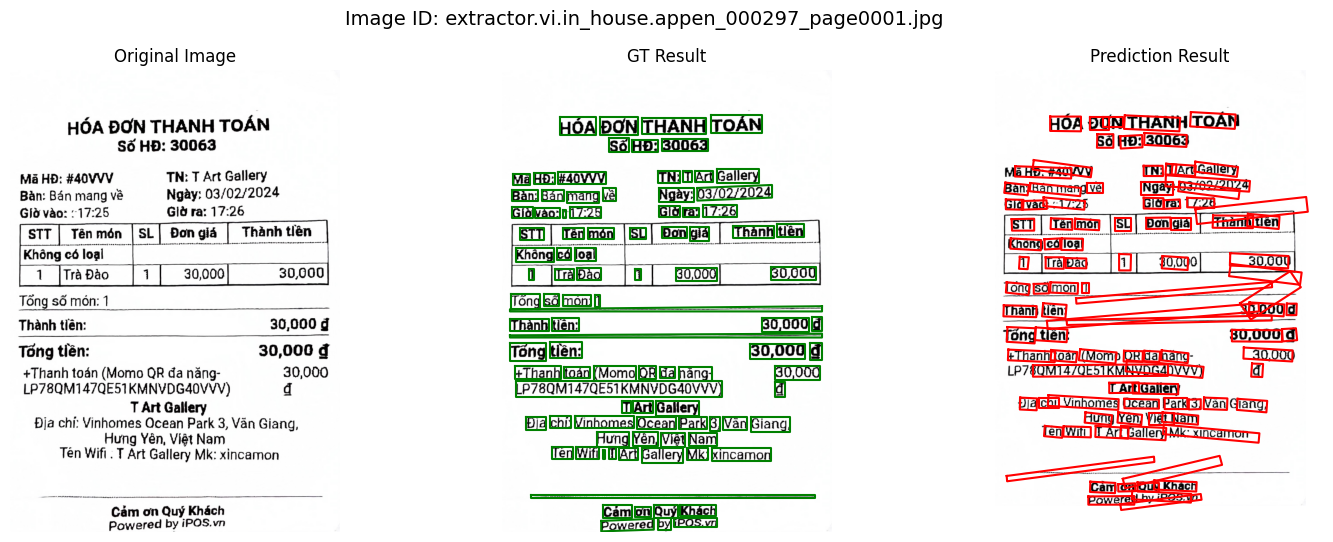

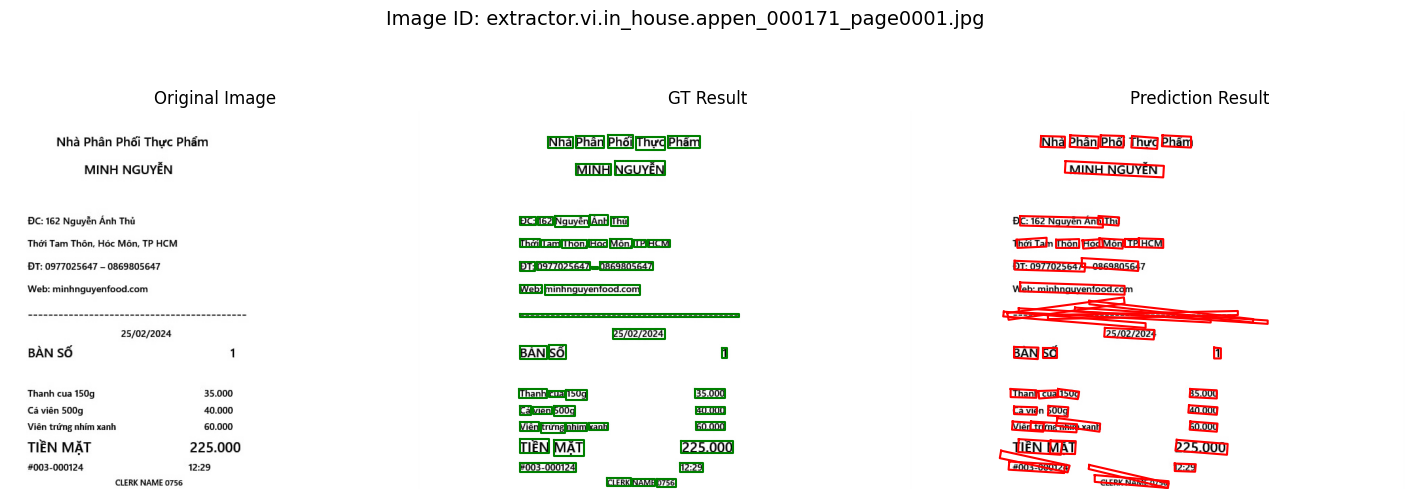

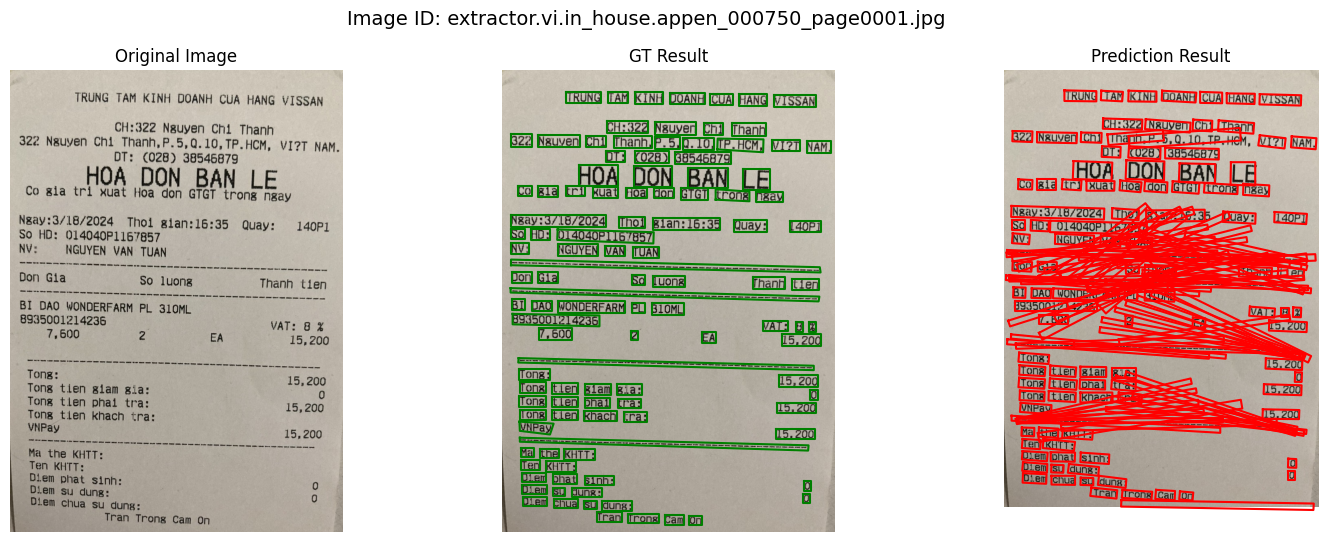

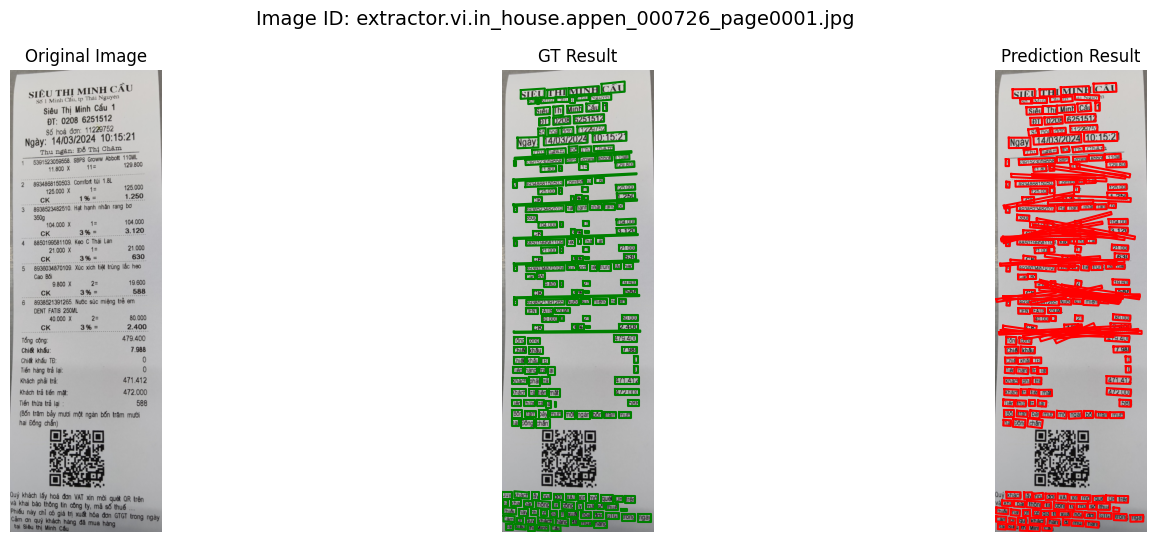

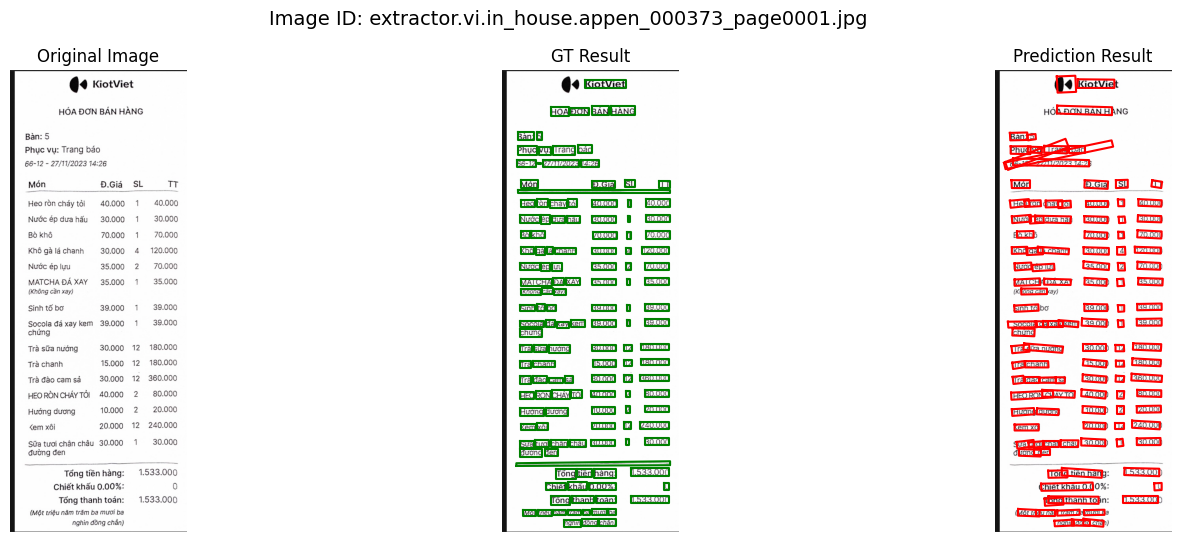

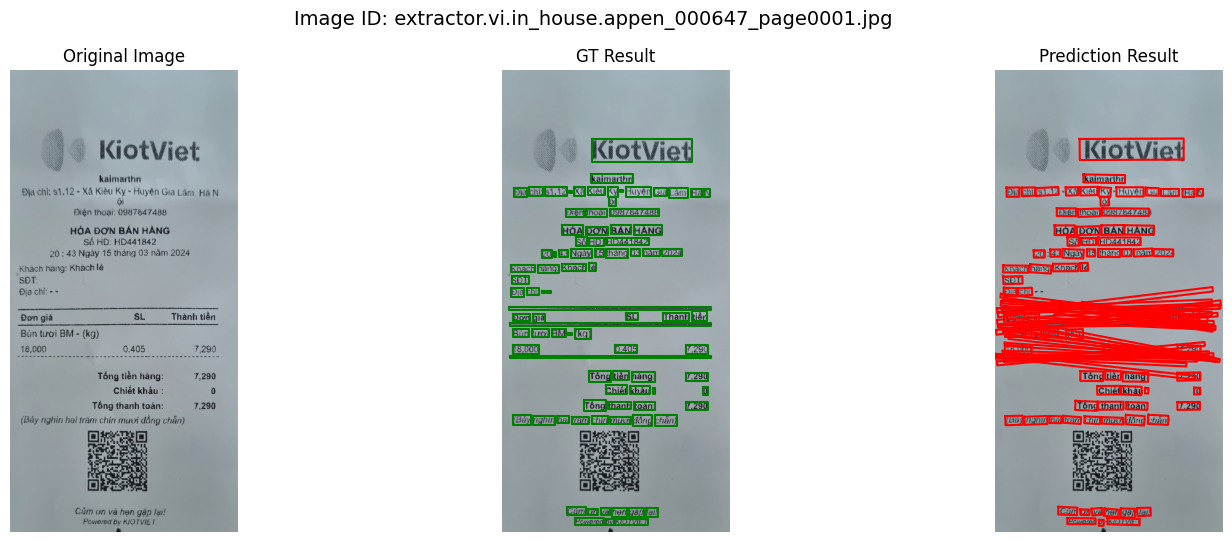

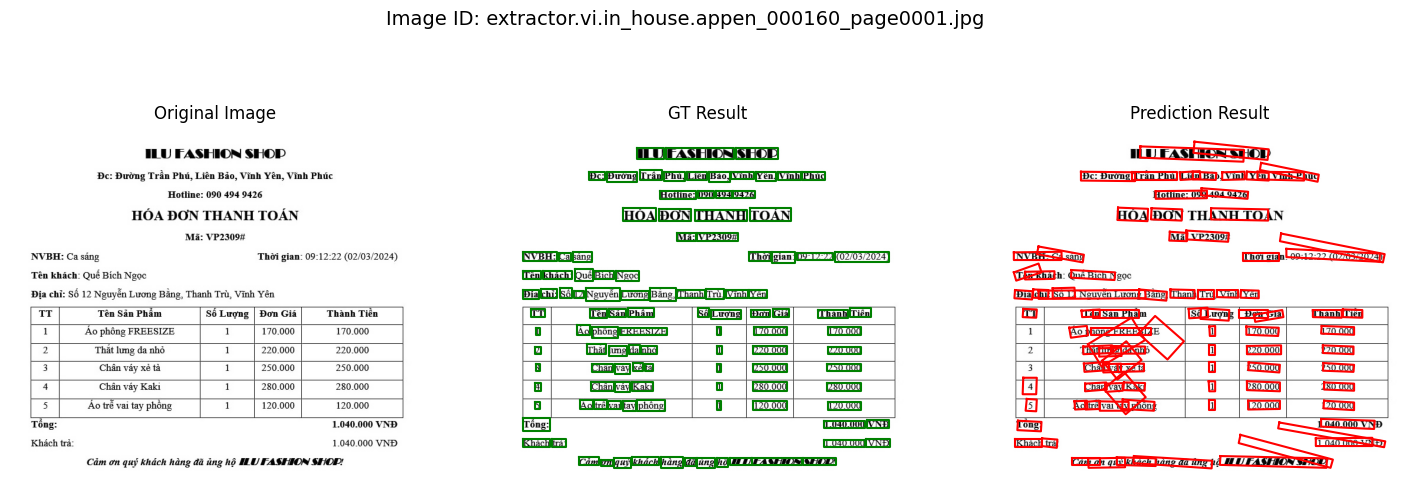

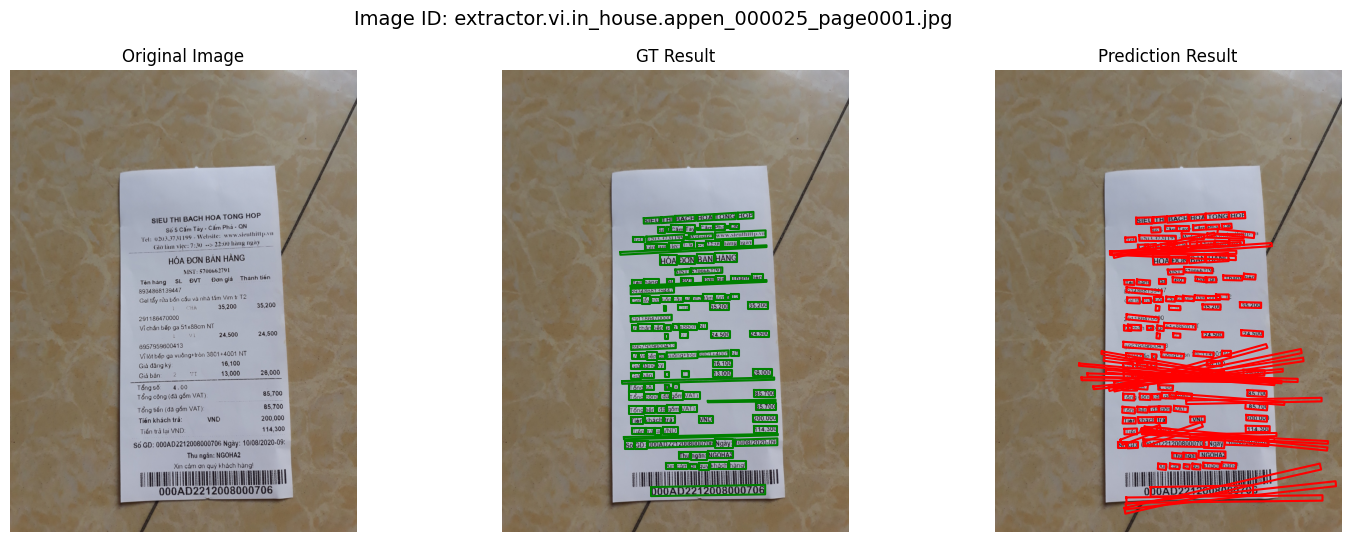

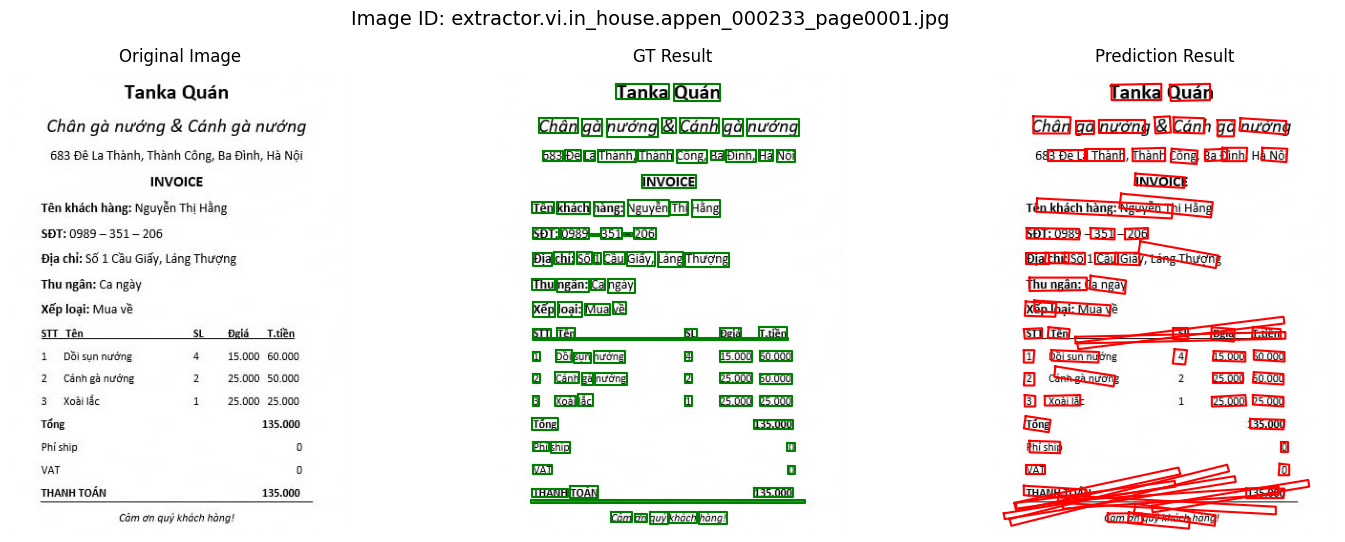

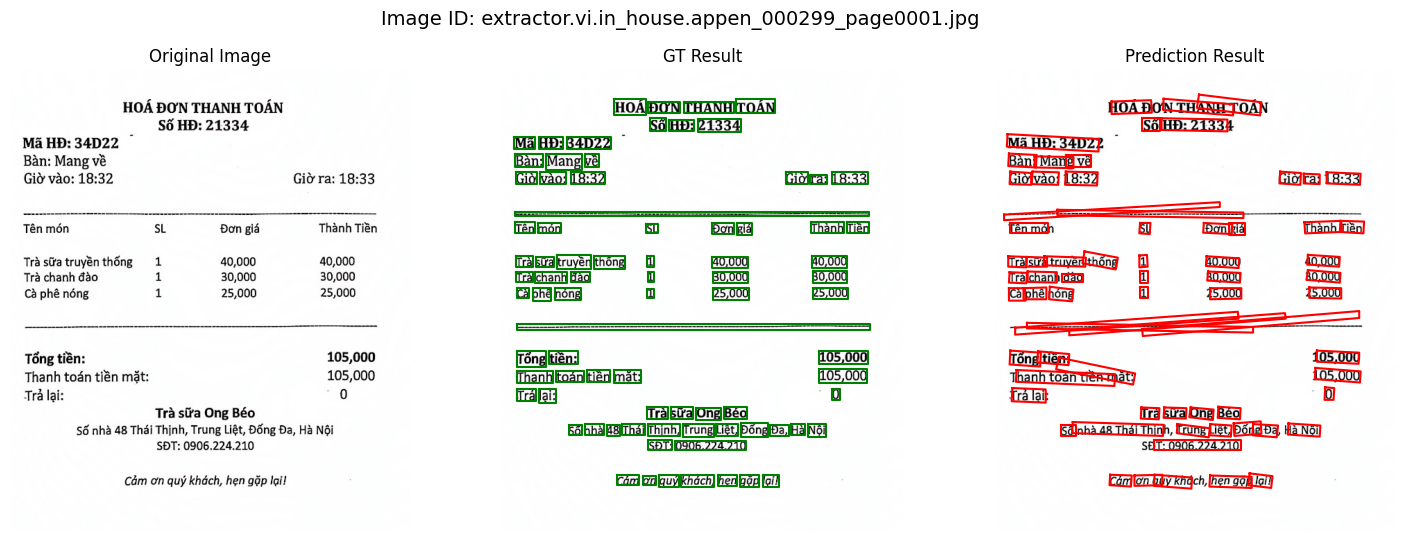

In [ ]:
def read_json(filename):
    with Path(filename).open(encoding='utf8') as handle:
        ann = json.load(handle)
    return ann

# 언어 선택
# chinese, thai, vietnamese, japanese
language = "japanese"


# 예측 결과 json 파일 로드
predict_data = read_json(f"./data/{language}_receipt/ufo/{language}_val_predict.json")
# 실제 값(GT) json 파일 로드
gt_data = read_json(f"./data/{language}_receipt/ufo/val.json")

# 랜덤 10개의 항목 선택
sampled_items = random.sample(list(predict_data['images'].items()), 10)

# GT와 predict 데이터를 저장할 딕셔너리 초기화
predict_dict = {}
gt_dict = {}


for image_id, value in sampled_items:
    predict_dict[image_id] = [word['points'] for word in value['words'].values()]
    if image_id in gt_data['images']:
        gt_dict[image_id] = [word['points'] for word in gt_data['images'][image_id]['words'].values()]

for img in predict_dict.keys():
    image_path = f"./data/{language}_receipt/img/val/{img}"
    image = cv2.imread(image_path)
    
    # 로드 실패시 출력
    if image is None:
        print(f"Error: Unable to load image at path {image_path}")
        continue

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV는 BGR 형식이므로 RGB로 변환

    # 원본 이미지, 실제 값 예측 값
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle(f"Image ID: {img}", fontsize=14, color='black')

    # 왼쪽: 원본 이미지
    axes[0].imshow(image_rgb)
    axes[0].set_title("Original Image")
    axes[0].axis("off")
    
    # 중앙: 실제 GT 결과 이미지
    axes[1].imshow(image_rgb)
    axes[1].set_title("GT Result")
    if img in gt_dict:
        for gt in gt_dict[img]:
            xy = np.int64(gt).reshape(-1, 2)
            xy1, xy2, xy3, xy4 = xy[0], xy[1], xy[2], xy[3]
            axes[1].plot([xy1[0], xy2[0], xy3[0], xy4[0], xy1[0]], 
                         [xy1[1], xy2[1], xy3[1], xy4[1], xy1[1]], 'g-')
    axes[1].axis("off")

    # 오른쪽: 예측 결과 이미지
    axes[2].imshow(image_rgb)
    axes[2].set_title("Prediction Result")
    for res in predict_dict[img]:
        xy = np.int64(res).reshape(-1, 2)
        xy1, xy2, xy3, xy4 = xy[0], xy[1], xy[2], xy[3]
        axes[2].plot([xy1[0], xy2[0], xy3[0], xy4[0], xy1[0]], 
                     [xy1[1], xy2[1], xy3[1], xy4[1], xy1[1]], 'r-')
    axes[2].axis("off")


    plt.show()